<a href="https://colab.research.google.com/github/RashmiDhakal/Deep-Learning/blob/main/Variant2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import utils
# keras packagaes
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img
from tqdm.notebook import tqdm

**Loading the Dataset**

In [4]:
train_dir = "/content/drive/MyDrive/data/Facial Expression/New_data/train/"
test_dir = "/content/drive/MyDrive/data/Facial Expression/New_data/test/"

In [5]:
def load_dataset(directory):
    image_paths = []
    labels = []
    
    for label in os.listdir(directory):
        for filename in os.listdir(directory+label):
            image_path = os.path.join(directory, label, filename)
            image_paths.append(image_path)
            labels.append(label)
            
        print(label, "Completed")
        
    return image_paths, labels

In [7]:
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(train_dir)
# shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
train.head()

angry Completed
disgust Completed
fear Completed
sad Completed
neutral Completed
surprise Completed
happy Completed


,image,label
0,/content/drive/MyDrive/data/Facial Expression/...,happy
1,/content/drive/MyDrive/data/Facial Expression/...,sad
2,/content/drive/MyDrive/data/Facial Expression/...,neutral
3,/content/drive/MyDrive/data/Facial Expression/...,fear
4,/content/drive/MyDrive/data/Facial Expression/...,surprise


In [10]:
train["image"].shape

(28720,)

In [11]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(test_dir)
test.head()

disgust Completed
surprise Completed
fear Completed
angry Completed
neutral Completed
happy Completed
sad Completed


,image,label
0,/content/drive/MyDrive/data/Facial Expression/...,disgust
1,/content/drive/MyDrive/data/Facial Expression/...,disgust
2,/content/drive/MyDrive/data/Facial Expression/...,disgust
3,/content/drive/MyDrive/data/Facial Expression/...,disgust
4,/content/drive/MyDrive/data/Facial Expression/...,disgust


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


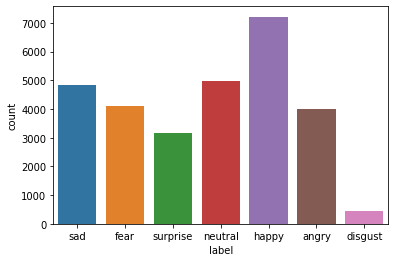

In [12]:
sns.countplot(train["label"])

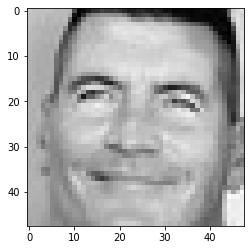

In [12]:
from PIL import Image
img = Image.open(train['image'][0])
plt.imshow(img, cmap='gray');

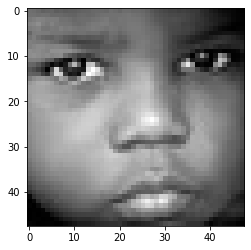

In [13]:
from PIL import Image
img = Image.open(train['image'][40])
plt.imshow(img, cmap='gray');

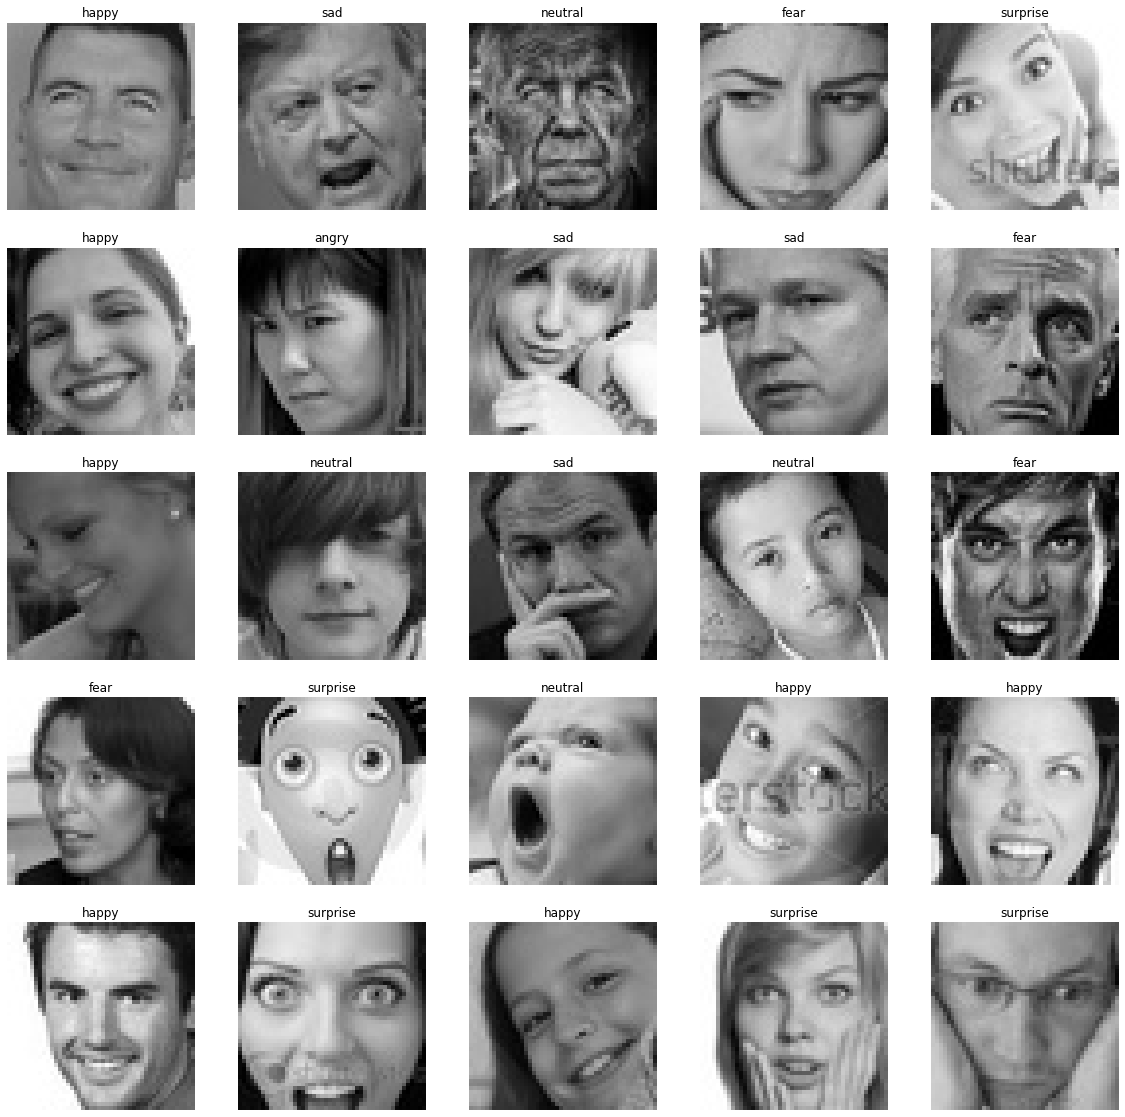

In [14]:
# to display grid of images
plt.figure(figsize=(20,20))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

**Feature Extraction**

In [63]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [33]:
train_features = extract_features(train['image'])

  0%|          | 0/28720 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [34]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [61]:
x_train = train_features/255.0
x_test = test_features/255.0

In [62]:
x_train.shape, y_train.shape

((28720, 48, 48, 1), (28720,))

In [82]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [73]:
y_test

array([1, 1, 1, ..., 5, 5, 5])

In [47]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((28720, 48, 48, 1), (28720,), (7178, 48, 48, 1), (7178,))

In [64]:
#Model 
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [3]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(7, activation='softmax'))



NameError: ignored

In [2]:
model.summary()

NameError: ignored

In [84]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [70]:
callback = EarlyStopping(monitor='val_loss', patience=5)

In [1]:
history = model.fit(x_train, y_train, batch_size=128, epochs=100,callbacks= [callback],validation_data =(x_test,y_test))

NameError: ignored